<a href="https://colab.research.google.com/github/elimeyer1/ML_4105/blob/main/4105_Homework1_Prob2_Meyer_Eli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = '/content/drive/MyDrive/4105/D3.csv'

df = pd.read_csv(url)

print(df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [ ]:
X = df.values[:, 0:3]  # get all input values in a 3 column arrray
y = df.values[:, -1]  # get output values from second column -- Y is the list here
m = len(y)  # Number of input  examples
n = len(X)  #
m

100

In [ ]:
## Created an array with the length of the input
## The inputs were then horizontally stacked nexted to that array of ones

X0 = np.ones((m,1))
X1 = X[:,0].reshape(m,1)
X2 = X[:,1].reshape(m,1)
X3 = X[:,2].reshape(m,1)
X = np.hstack((X0, X1, X2, X3))
X[:5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [ ]:
## The theta is inialized and printed
## the theta is 4 dimensions because there are 3 variables beign assesed at the same time

theta = np.zeros((4))
theta

array([0., 0., 0., 0.])

In [ ]:
## This is the compute cost function
## it perfroms all of the said functions to the 4 dimensional arrays inputted

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
cost = compute_cost(X, y, theta)
cost


5.524438459196242

In [ ]:
## the gradient descent updates the theta values according to the learning curve to find the best regression line

def gradient_descent(X, y, theta, alpha, iterations):

    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [ ]:
## The theta alpha and and iterations are inialized

theta1 = [0., 0., 0., 0.]
iterations = 1200
alpha = 0.04

In [ ]:
## The gradient descent function is run wiht the input values

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.27120247 -1.99764979  0.53966299 -0.25930411]
cost_history = [4.51455638 4.13668881 3.89647561 ... 0.73856416 0.73856336 0.73856257]


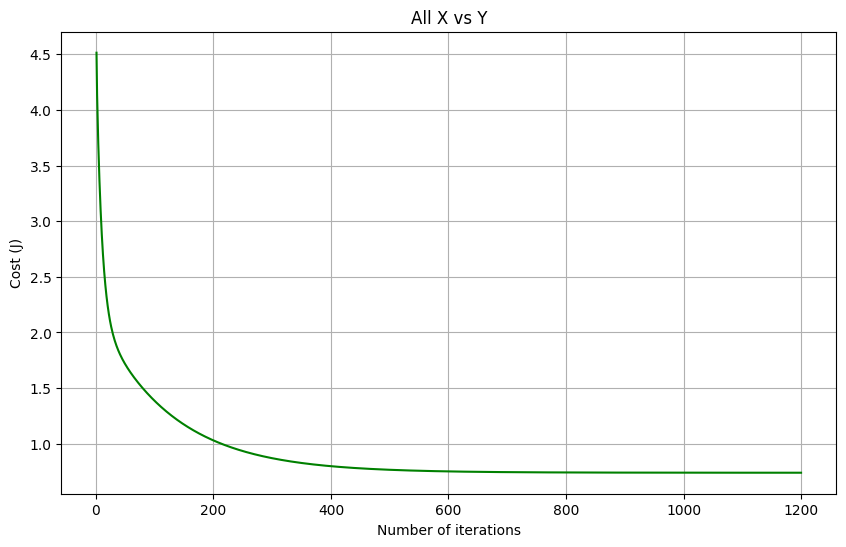

In [ ]:
## The gradient Descent function is plotted

plt.plot(range(1, iterations + 1), cost_history, color='green')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('All X vs Y')

# Show the plot
plt.show()

In [ ]:
## Using the theta values the predicted y values can be found by multiping and suming them together.

predict1 = [1,1,1,1]*theta
predict1=sum(predict1)
predict2 = [1,2,0,4]*theta
predict2=sum(predict2)
predict3 = [1,3,2,1]*theta
predict3=sum(predict3)
print(predict1)
print(predict2)
print(predict3)

3.553911548538418
0.2386864291249855
0.09827495016138704
